Write a discrete event simulation program for a blocking system, i.e. a system with m service units and no waiting room. The offered traffic A is the product of the mean arrival rate and the mean service time.
1. The arrival process is modelled as a Poisson process. Report the fraction of blocked customers, and a confidence interval for this fraction. Choose the service time distribution as exponential. Parameters: m = 10, mean service time = 8 time units, mean time between customers = 1 time unit (corresponding to an offered traffic of 8 Erlang), 10 x 10.000 customers.

In [172]:
from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np
import scipy.stats as st

System events:
- accepted entry
- blocked entry

In [475]:
customers = 10000
sim = 10


m = 10

#mean service time
s = 8

#mean time between customers, arrival rate 1 customer per time unit
mean_tbc = 1
arrival_intensity = 1

#confidence interval
def conf_int (mean, std, n):
       Z = st.t.ppf(0.95, sim)
       return (mean - Z * (std/math.sqrt(n)), mean + Z * (std/math.sqrt(n)))



p_dist = np.random.poisson(lam=arrival_intensity, size=customers)
exp_dist = np.random.exponential(1, customers)

A = arrival_intensity * s
def Erlang_B (A, m):
    d = 0
 
    for i in range(m+1):
        d = d + A**i / math.factorial(i)

    return ( (A**m) / math.factorial(m) ) / d

B =  Erlang_B (A, m)

Z = 1.96
ci = (B - Z * math.sqrt(B * (1 - B)) / customers, B + Z * math.sqrt(B * (1 - B)) / customers)


print("fraction blocked = " + str(B))
print("confidence interval = " + str(ci))



fraction blocked = 0.12166106425295149
confidence interval = (0.12159699304020513, 0.12172513546569785)


2. The arrival process is modelled as a renewal process using the same parameters as in Part 1 when possible. Report the fraction of blocked customers, and a confidence interval for this fraction for at least the following two cases

(a) Experiment with Erlang distributed inter arrival times The Erlang distribution should have a mean of 1

/var/folders/4l/6stdwbh56pvgwz8thwnlgtq80000gn/T/ipykernel_64711/1452323895.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(erl, kde=False)


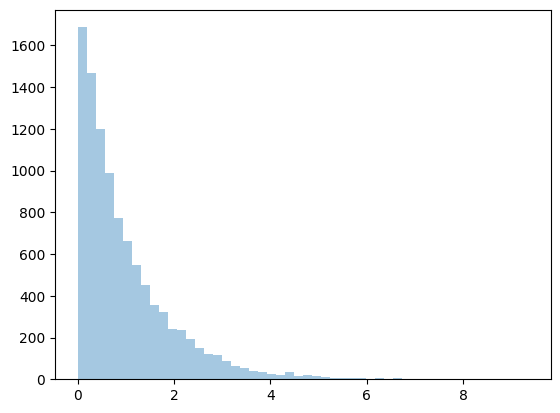

In [261]:
l = 1
u = np.random.uniform(low=1, high=10, size=customers)
t = 0

erl = st.erlang.rvs(l, size=customers, scale=mean_tbc)
sns.distplot(erl, kde=False)
plt.show()



(b) hyper exponential inter arrival times. The parameters for the hyper exponential distribution should be
p1 = 0.8,λ1 = 0.8333,p2 = 0.2,λ2 = 5.0.

[2.16879668 3.03439664 8.64574185 ... 5.33607403 4.99860012 6.04134642]
[2.4459701847719986, 3.0345108597856045, 4.945296757429221, 2.185688052562959, 5.0454453106883195, 4.035623615262754, 3.4793061662395717, 4.414867972351769, 5.040376292791316, 2.905158435776055, 4.312522425064492, 3.1856191628558896, 4.7155699491828855, 3.534060578919168, 3.2234773902591662, 4.571587967894549, 4.294889709889097, 1.4956631520775774, 5.086365150025833, 2.8003846859050316, 3.3664766873802523, 4.513488126914557, 4.702447732034965, 3.528111639858671, 5.083857311805769, 3.809193912783473, 4.399509116135124, 4.644304103515863, 3.6256981513764885, 2.522646086728595, 4.976191325152299, 4.0128825994961765, 4.685602251616604, 1.752128590218591, 2.0983447896128276, 1.4332030653728882, 4.292779179344527, 5.136308037123183, 5.1489521870323065, 2.2112270451195597, 5.007152288675897, 4.357228901120729, 5.058898925287863, 3.7758368287434023, 1.8585306664215389, 2.468008247952775, 1.8112377658218408, 4.6576510554237

/var/folders/4l/6stdwbh56pvgwz8thwnlgtq80000gn/T/ipykernel_64711/3769154519.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cdf, kde=False)


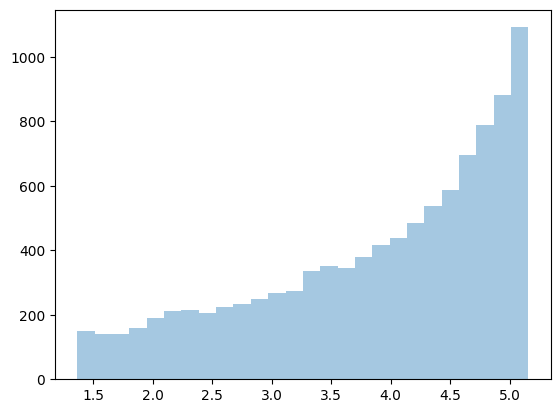

In [262]:
print(u)

hypexp = []

m = 2
li = [0.8333, 5.0]
pi = [0.8, 0.2]

cdf = []
x = 1
for i in range(len(u)):
    cdf.append( 0.8333 * (1 - math.exp(-0.8 * u[i])) + 5.0 * (1 - math.exp(-0.2 * u[i])) )

print(cdf)
sns.distplot(cdf, kde=False)
plt.show()


3. The arrival process is again a Poisson process like in Part 1. Experiment with different service time distributions with the same mean service time and m as in Part 1 and Part 2.

(a) Constant service time

In [360]:
m = 10


mst1 = 8


fract_blocked_counts = []
blocked_customer_count = 0

#set service time for all units to zero
service_unit_time = np.zeros(m)

for _ in range(sim):
  blocked_customer_count = 0
  #go through all customers
  for i in range(customers):
    #generate random arrival time for coming customer
    arrival_time = p_dist[i]
    #subtract the arrival time from the service units times
    service_unit_time -= arrival_time

    #sort the service units with increasing time
    service_unit_time = np.sort(np.maximum(service_unit_time, 0.0))

    #check if there are service units 
    if (len([i for i in service_unit_time if i < 0.1]) == 0):
      blocked_customer_count += 1
    else:
      service_unit_time[0] = mst1
              
  fract_blocked_counts.append(blocked_customer_count/customers)


#take the mean of the fractions of blocked costumers from the simulations
avg_fract_blocked = np.sum(fract_blocked_counts) / sim
print("fraction blocked: " + str(np.mean(fract_blocked_counts)))
print("fraction Erlang blocked: " + str(Erlang_B (s, m)))
print("Confidence interval = " + str(conf_int (np.mean(fract_blocked_counts), np.std(fract_blocked_counts), sim)))


fraction blocked: 0.10290000000000002
fraction Erlang blocked: 0.12166106425295149
Confidence interval = (0.1029, 0.10290000000000003)


(b) Pareto distributed service times with at least k = 1.05 and
k = 2.05.

In [480]:
# mst2 = ( (np.random.pareto(1.05, size=customers) + 1) * ( (((2.05-1)* 8)/2.05) ) )
#mst2 = np.array([st.pareto.pdf(x, scale=( ((1.05-1)/1.05) * 8), b=1.05)])
p_dist = np.random.exponential(1, size=customers)

m = 10
s = 8.0

fract_blocked_counts = []
blocked_customer_count = 0

index = 0


customers = 10000

for k in [1.05, 2.05]:
    fract_blocked_counts = []
    
    for j in range(sim):
        blocked_customer_count = 0
        #set service time for all units to zero
        service_unit_time = np.zeros(m)

        #go through all customers
        for i in range(customers):
            #generate random arrival time for coming customer
            arrival_time = p_dist[i]
            #if (k==1.05) : print("arrival time: " + str(arrival_time))
            #subtract the arrival time from the service units times
            service_unit_time -= arrival_time
            #if (k==1.05) : print("service unit time - : " + str(service_unit_time))

            #sort the service units with increasing time
            service_unit_time = np.sort(np.maximum(service_unit_time, 0.0))
            #if (k==1.05) : print("service unit time after sort : " + str(service_unit_time))

            #check if there are service units 
            if (len([i for i in service_unit_time if i < 10**(-100)]) == 0):
                blocked_customer_count += 1
                #print("Blocked")
            else:
                x_m = s * (k - 1) / k
                service_unit_time[0] = ( ( np.random.pareto(k, size=1) + 1) * x_m ) [0]
                #if (k==1.05) : print("service unit time after add : " + str(service_unit_time))


                #np.random.pareto(2.05, 1)[0]
                #(np.random.pareto(k, 1) + 1) * (k-1)/k * s
                

        fract_blocked_counts.append(blocked_customer_count/customers)
        #print("blocked customer count: " + str(blocked_customer_count))

    if (index == 0):
        print("For k = 1.05: ")
    else: print("For k = 2.05: ")
    index += 1

    print("fraction blocked: " + str(np.mean(fract_blocked_counts)))
    print("fraction Erlang blocked: " + str(Erlang_B (s, m)))
    print("Confidence interval = " + str(conf_int (np.mean(fract_blocked_counts), np.std(fract_blocked_counts), sim)))

    





#take the mean of the fractions of blocked costumers from the simulations
#avg_fract_blocked = np.sum(fract_blocked_counts) / sim



For k = 1.05: 
fraction blocked: 0.0005299999999999999
fraction Erlang blocked: 0.12166106425295149
Confidence interval = (0.00019772095316985654, 0.0008622790468301431)
For k = 2.05: 
fraction blocked: 0.11521999999999999
fraction Erlang blocked: 0.12166106425295149
Confidence interval = (0.1123643756139898, 0.11807562438601017)


(c) Choose one or two other distributions.

In [391]:
#Normal distribution
mst4 = np.random.normal(0, 1, customers)

fract_blocked_counts = []
blocked_customer_count = 0

for _ in range(sim):
  blocked_customer_count = 0
  
  #set service time for all units to zero
  service_unit_time = np.zeros(m)

  #go through all customers
  for i in range(customers):
    #generate random arrival time for coming customer
    arrival_time = p_dist[i]
    #subtract the arrival time from the service units times
    service_unit_time -= arrival_time

    #sort the service units with increasing time
    service_unit_time = np.sort(np.maximum(service_unit_time, 0.0))

    #check if there are service units 
    if (len([i for i in service_unit_time if i < 0.1]) == 0):
      blocked_customer_count += 1
    else:
      service_unit_time[0] = np.random.normal(0, 1, 1)[0]
              
  fract_blocked_counts.append(blocked_customer_count/customers)


#take the mean of the fractions of blocked costumers from the simulations
avg_fract_blocked = np.sum(fract_blocked_counts) / sim
print("fraction blocked: " + str(np.mean(fract_blocked_counts)))
print("fraction Erlang blocked: " + str(Erlang_B (s, m)))
print("Confidence interval = " + str(conf_int (np.mean(fract_blocked_counts), np.std(fract_blocked_counts), sim)))


fraction blocked: 0.0
fraction Erlang blocked: 0.12166106425295149
Confidence interval = (0.0, 0.0)
